# FordGo bike System Data Exploration

### By Faouzi NAJEH

### Table contents
<ul> 
    <li>1.Wrangling & Cleaning Data</li>
    <li>2.Univariate Exploration</li>
    <li>3.Bivariate Exploration</li>
    <li>4.Multivariate Exploration</li>
    <li>5.Sources</li>
</ul>

## 1. Data Wrangling

In [1]:
#Load all needed packages through the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#import data with pandas
data = pd.read_csv('gobike-trip.csv')

### 1.1. Assessing Data

In [3]:
#Take a look to the head ten rows of our dataset
data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
#what is the shape of our data
data.shape

(183412, 16)

In [5]:
# Further Infos about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Describe data 
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#looking for duplicates
data.duplicated().sum()

0

We don't have duplicates in oour dataset.

In [8]:
#Null values in the dataset
data.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

As mentioned in the info result, we have a bunch of null values that we should clean.

In [9]:
# We can use sampling from the dataset to verify innaccurate data and further issues
data.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
173938,385,2019-02-03 07:33:27.7340,2019-02-03 07:39:52.9130,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,150.0,Adeline St at 40th St,37.831277,-122.278267,4551,Subscriber,1982.0,Female,No
174068,834,2019-02-02 23:33:20.1560,2019-02-02 23:47:14.2600,145.0,29th St at Church St,37.743684,-122.426806,100.0,Bryant St at 15th St,37.767100,-122.410662,5010,Subscriber,1972.0,Male,No
53971,182,2019-02-21 14:16:15.3550,2019-02-21 14:19:18.1990,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,169.0,Bushrod Park,37.846516,-122.265304,5621,Subscriber,1986.0,Male,No
19536,408,2019-02-26 16:42:30.8960,2019-02-26 16:49:19.5000,115.0,Jackson Playground,37.765026,-122.398773,350.0,8th St at Brannan St,37.771431,-122.405787,5523,Subscriber,1986.0,Male,No
137871,348,2019-02-08 08:19:08.2410,2019-02-08 08:24:57.1310,9.0,Broadway at Battery St,37.798572,-122.400869,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,4326,Customer,1995.0,Male,No
31878,865,2019-02-24 15:36:11.0520,2019-02-24 15:50:36.6900,212.0,Mosswood Park,37.824893,-122.260437,274.0,Oregon St at Adeline St,37.857567,-122.267558,4627,Subscriber,1979.0,Male,No
152438,348,2019-02-06 15:50:15.1750,2019-02-06 15:56:03.8720,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870139,-122.268422,1510,Customer,NaN,NaN,No
100642,437,2019-02-14 18:11:49.0730,2019-02-14 18:19:06.6970,89.0,Division St at Potrero Ave,37.769218,-122.407646,125.0,20th St at Bryant St,37.759200,-122.409851,5142,Subscriber,1987.0,Male,No
64600,882,2019-02-20 11:30:22.9430,2019-02-20 11:45:05.5980,115.0,Jackson Playground,37.765026,-122.398773,132.0,24th St at Chattanooga St,37.751819,-122.426614,6562,Customer,1983.0,Male,No
59860,331,2019-02-20 19:27:12.1730,2019-02-20 19:32:43.7990,81.0,Berry St at 4th St,37.775880,-122.393170,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,3621,Subscriber,1962.0,Male,No


#### At the end of this assessing part we can conclude issues we found in our dataset :
1. 'start_time' and 'end_time' columns must be in datetime format.
2. For ID's columns we can work with an object datatype rather than 'int' or 'float'.   
3. The 'member_birth_year' type should be integer instead of float.
4. We have some innaccurate values in the 'member_birth_year' column. 
5. We have to onvert 'user_type', 'member_gender' and 'bike_share_for_all_trip' to categories. 
6. Null values in columns : {'start_station_id', 'start_station_name', 'end_station_name', 'end_station_id', 'member_birth_year', 'member_gender'}.

### 1.2. Cleaning Data

During the cleaning process, I will proceed the define, code, test steps, that we have practiced through the course.

#### Issue 1 

#### Define
Convert columns datatype to the right one:
 - 'start_time', 'end_time' to datetime dtype
 - 'ID's' to object format
 - 'member_birth_year' to int instead of float
 - 'user_type', 'member_gender' and 'bike_share_for_all_trip' to categories.

#### Code

In [10]:
#At first, I will make a copy of the dataset
df = data.copy()

In [11]:
#Convert 'start_time' and 'end_time' columns to datetime format
df['start_time'] = df['start_time'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df['end_time'] = df['end_time'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [12]:
#Convert 'ID's' columns to object format
df['bike_id'] = df['bike_id'].astype(str)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)

#### Test

In [13]:
#We can verify that all columns are converted, except the 'member_birth_year'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Issue 2 

#### Define
Since we have the 'member_birth_year' so we can create a new column to hold the bike rider 'age' so the information will be more reliable.

#### Code

In [14]:
df['member_age'] = 2021 - df['member_birth_year']

#### Test

In [15]:
#We can see the 'age' new column is created
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0


#### Issue 3

#### Define
Innaccurate data in the 'member_birth_year' so in 'member_age'.

In [16]:
df['member_age'].describe()
# A very high maximum! innaccurate value!
# For more accuracy, I will set the maximum of bike riders age to 65 year, so we will work only with rows under this age

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

In [17]:
#So we now have to query the old dataset to only take members are under 65 year old
df = df.query('member_age <= 65')

In [18]:
#As mentioned previously, we should convert 'member_birth_year' to integer datatype, same for the new age column
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['member_age'] = df['member_age'].astype(int)

#### Test

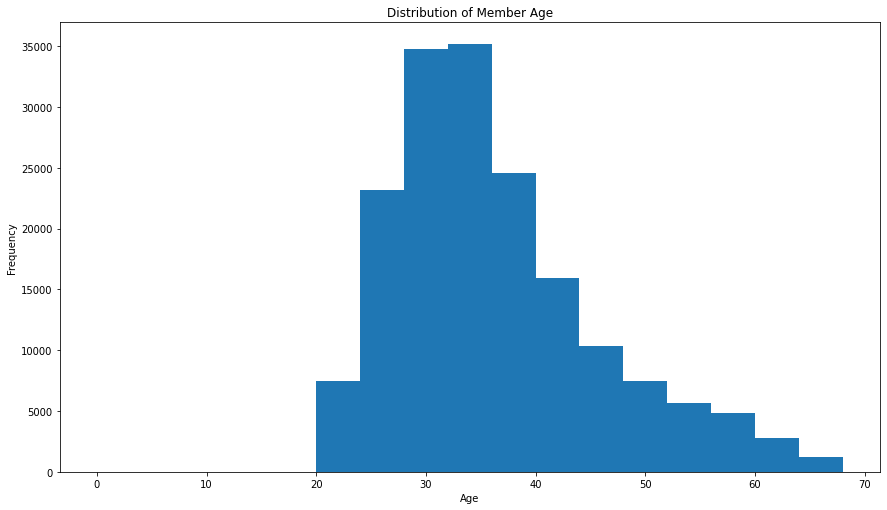

In [19]:
plt.figure(figsize=(14.7, 8.27))
bins = np.arange(0, df['member_age'].max() + 4, 4)
plt.hist(df['member_age'], bins = bins)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Member Age');

In [20]:
df['member_age'].describe()

count    173333.000000
mean         35.802005
std           9.342947
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          65.000000
Name: member_age, dtype: float64

In [21]:
df.sample(15)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
79709,215,2019-02-18 17:09:42.055,2019-02-18 17:13:17.448,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,6405,Subscriber,1989,Male,No,32
164849,225,2019-02-05 08:08:06.396,2019-02-05 08:11:51.808,101.0,15th St at Potrero Ave,37.767079,-122.407359,90.0,Townsend St at 7th St,37.771058,-122.402717,3652,Subscriber,1992,Female,No,29
80222,2732,2019-02-18 15:26:32.878,2019-02-18 16:12:05.047,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,84.0,Duboce Park,37.769201,-122.433812,4449,Customer,1996,Female,No,25
19681,1072,2019-02-26 16:02:21.682,2019-02-26 16:20:14.011,114.0,Rhode Island St at 17th St,37.764478,-122.402570,122.0,19th St at Mission St,37.760299,-122.418892,4832,Subscriber,1988,Other,Yes,33
99730,2184,2019-02-14 18:46:22.458,2019-02-14 19:22:47.135,375.0,Grove St at Masonic Ave,37.774836,-122.446546,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6499,Subscriber,1961,Male,Yes,60
84611,1087,2019-02-17 16:59:20.321,2019-02-17 17:17:28.234,31.0,Raymond Kimbell Playground,37.783813,-122.434559,121.0,Mission Playground,37.759210,-122.421339,5410,Customer,1978,Female,No,43
120961,368,2019-02-11 16:24:25.220,2019-02-11 16:30:33.947,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,654,Subscriber,1986,Female,No,35
106703,264,2019-02-13 17:45:07.973,2019-02-13 17:49:32.371,176.0,MacArthur BART Station,37.828410,-122.266315,315.0,Market St at 45th St,37.834174,-122.272968,1149,Subscriber,1987,Male,No,34
96982,427,2019-02-15 09:28:59.818,2019-02-15 09:36:07.817,81.0,Berry St at 4th St,37.775880,-122.393170,24.0,Spear St at Folsom St,37.789677,-122.390428,6250,Subscriber,1978,Male,No,43
69951,323,2019-02-19 18:49:05.425,2019-02-19 18:54:29.004,321.0,5th St at Folsom,37.780146,-122.403071,26.0,1st St at Folsom St,37.787290,-122.394380,5028,Subscriber,1990,Male,No,31


#### Issue 4 
#### Define : add a new column for the trip duration in minutes

#### Code

In [22]:
df['duration_min'] = df['duration_sec']/ 60

#### Test

In [23]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,32,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,62,29.883333


#### Define
#### From the start_time column that we have in our dataset we can create foor features like 'start_date', 'day of week'  and the 'start_hour' of the day, that's will allow us to show variation of trip hour-frequency during the each day of the week. 

#### Code 

In [24]:
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')
# Orders for hours of day and days of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13'
             , '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

#### Test

In [25]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,start_date,start_hour,start_dayofweek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,37,869.750000,2019-02-28,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,49,1030.900000,2019-02-28,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,32,608.166667,2019-02-28,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,47,26.416667,2019-02-28,23,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,62,29.883333,2019-02-28,23,Thursday


### What is the structure of your dataset?

##### We have 183412 bike rider in this dataset with 16 features that held various informations about each row whose can be presented as : 
1. Location : which is defined by longitude and latitude variables prensented as floats.
2. Time : defined by two datetime variables('start_time' and 'end_time') and 'duration' which is an integer that present the trip duration in seconds. 
3. ID's : refers to bike and various stations, presented as objects.
4. Bike-riders different informations ('age', 'category', 'gender', 'birth_year'), also stations names.

### What is/are the main feature(s) of interest in your dataset?

We have three type of features in our dataset whose are time, location, member_info's I think all of these features seems to be interesting especially 'time' and 'location' these can lead to tell important story about the dataset and answer a bunch of advanced business questions.
In this project I'm interested to :
1. I will investigate the duration feature and its realtion with start_hour and day of week.
2. Determine the rush hour and the most frequent day in term of bike usage, and the relation of each one with duration and categorical variables(user_type, member_gender).
3. Ivestigate about most frequent station in our dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For this project I am interested to determine the rush hour/day of week, and the most frequent start_station in the dataset , how does the trip duration variate with start_hour and day_ofweek, so I think 'duration', 'start_time', 'end_time', 'hour', 'day_of_week', 'start_station_name' are the most interested features to get answers about these questions. 

### 2. Univariate Exploration

In this part I will first explore time features like ('duration', 'start_time') and then try to depict user_type and most frequent start_station in term of counts we have in our dataset.

In [26]:
#set a base color
base_color = sb.color_palette()[0]

#### Explore the distribution of 'duration' feature 

In [27]:
df['duration_sec'].describe()

count    173333.000000
mean        704.105629
std        1647.261651
min          61.000000
25%         323.000000
50%         510.000000
75%         788.000000
max       84548.000000
Name: duration_sec, dtype: float64

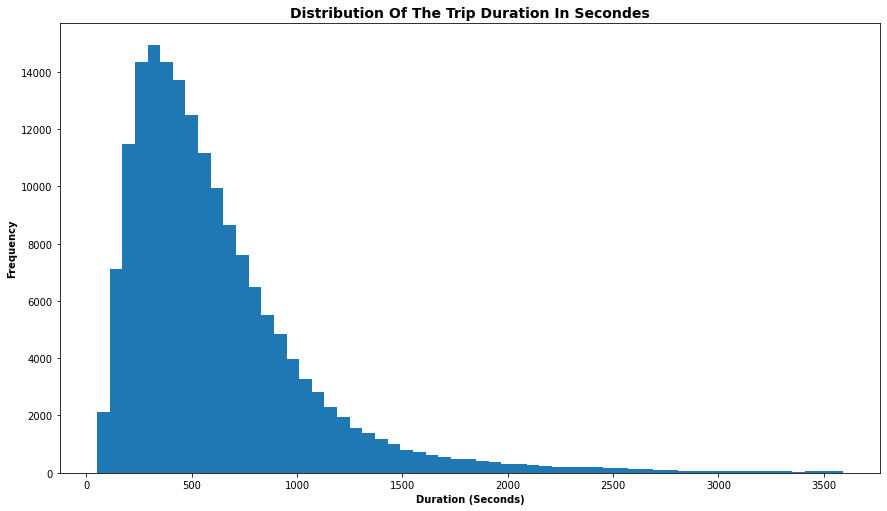

In [28]:
# first let's visualize the distribution of the trip duration in secondes with histogram
plt.figure(figsize=[14.7, 8.27])
bins = np.arange(50, 3600, 60)
 
plt.hist(data = df, x='duration_sec', bins=bins)
plt.xlabel('Duration (seconds)'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Distribution of the Trip Duration in secondes'.title(), fontsize=14, weight='bold');

#### Visualize the distribution of duration_sec with 'log' scale

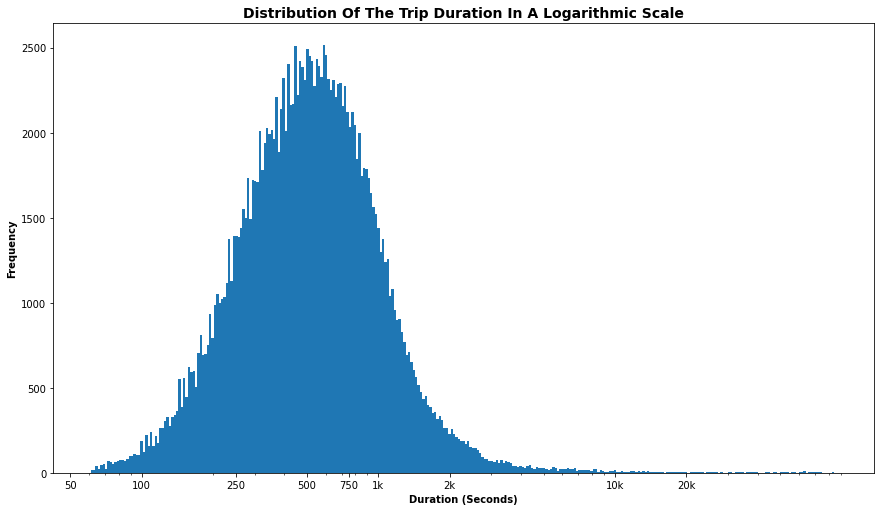

In [29]:
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max()) + 0.01 , 0.01)
plt.figure(figsize=[14.7, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 250, 500, 750, 1e3, 2e3, 1e4, 2e4], [50, 100, 250, 500, 750, '1k', '2k', '10k', '20k'])
plt.xlabel('Duration (seconds)'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Distribution of the Trip Duration in a Logarithmic scale'.title(), fontsize=14, weight='bold');

#### Visualize the distribution of duration in minutes

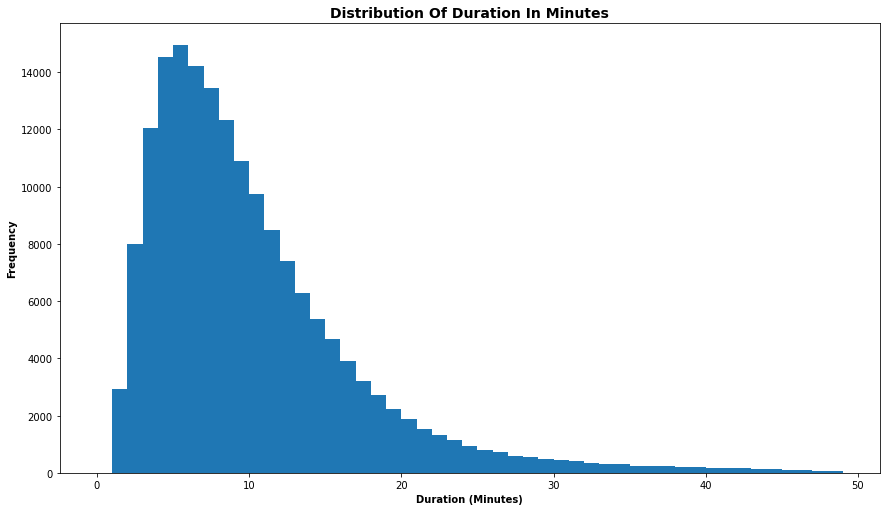

In [30]:
# visualize the distribution of the trip duration in minutes with histogram
plt.figure(figsize=[14.7, 8.27])
bins = np.arange(0, 50, 1)
ticks=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['{}'.format(k) for k in ticks]
plt.hist(data = df, x='duration_min', bins=bins)
plt.xlabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Distribution of duration in minutes'.title(), fontsize=14, weight='bold');

In [31]:
#describe duration_min variable
df['duration_min'].describe()

count    173333.000000
mean         11.735094
std          27.454361
min           1.016667
25%           5.383333
50%           8.500000
75%          13.133333
max        1409.133333
Name: duration_min, dtype: float64

**Observation1** : From the plots above we can conclude:
1. The'duration' variable is normally distributed, unimodal distribution.
2. Most of trips duration falling in the interval **[1, 15] minutes**, and 75% of trips duration are lower than 13 minutes.

#### Explore the  'start_hour' and 'start_dayofweek' features derived from start_time

Look at the most frequent start_hour (rush hour) and most frequent day in term of bike usage.

In [32]:
# describe start_dayofweek
df.start_dayofweek.describe()

count       173333
unique           7
top       Thursday
freq         33386
Name: start_dayofweek, dtype: object

In [33]:
# describe start_hour
df.start_hour.describe()

count     173333
unique        24
top           17
freq       20779
Name: start_hour, dtype: object

In [34]:
def myCountPlot(df, xVar, order, color, hueVar=None, palette=None):
    #this function will take a column named xVar from the df dataframe 
    # and plot data with a seaborn countplot, with the specified order
    #set up the plot
    ax = sb.countplot(data = df, x = xVar, hue = hueVar, color=color, order=order, palette=palette)
    #Plot labels
    ax.set(xlabel= xVar.replace('_', ' ').title(),
          ylabel = 'Frequency',
          title = f"Frequency of Bike usage by {xVar.replace('_', ' ')}".title());

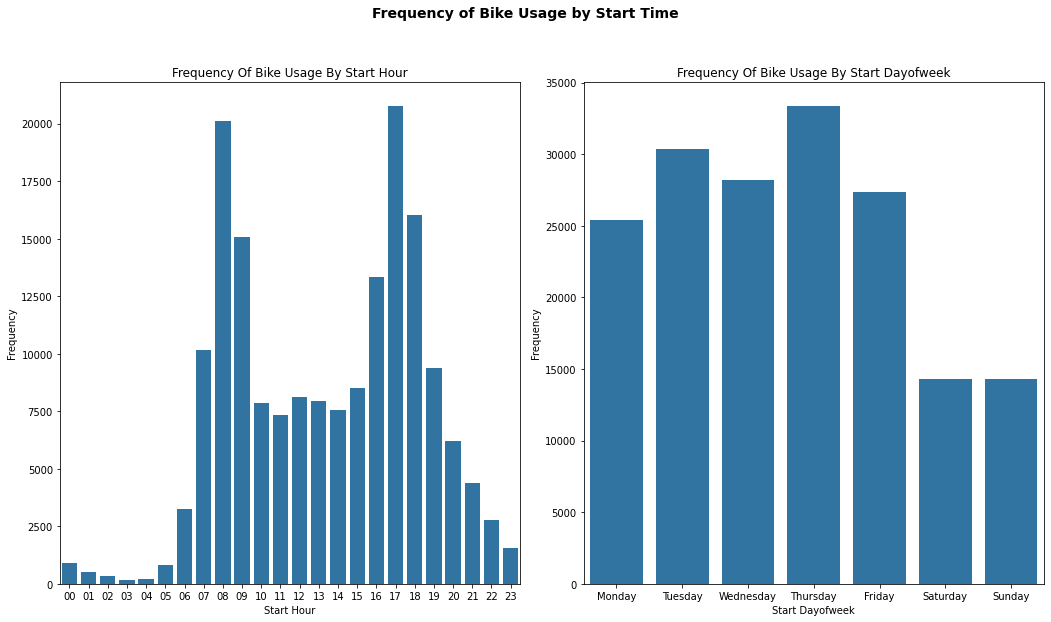

In [59]:
#Both_in_one
plt.figure(figsize=[14.7, 8.27])

#first plot
plt.subplot(1, 2, 1)
myCountPlot(df, 'start_hour', hour_order, color=base_color)

#Second plot
plt.subplot(1, 2, 2)
myCountPlot(df, 'start_dayofweek', day_order, color=base_color)

plt.suptitle("Frequency of Bike Usage by Start Time", y = 1.04, fontsize=14, weight='bold')
plt.tight_layout();

**Observation2** : 
1. First plot
- We have two rush hours one from 8am to 9am and a second from 17am to 18 am.
- That's can be simply explained by the traffic of a city workday.

**Observation3** : 

2. Second plot
- Generally, we have a low usage of bike on the weekend and a high one during other day of the week, with 'Thursday' as the most frequent day, also 'Tuesday' and 'Wednesday' indicates important number of trips. 

#### Explore the user_type 

In [36]:
# count of each type
df.user_type.value_counts()

Subscriber    156800
Customer       16533
Name: user_type, dtype: int64

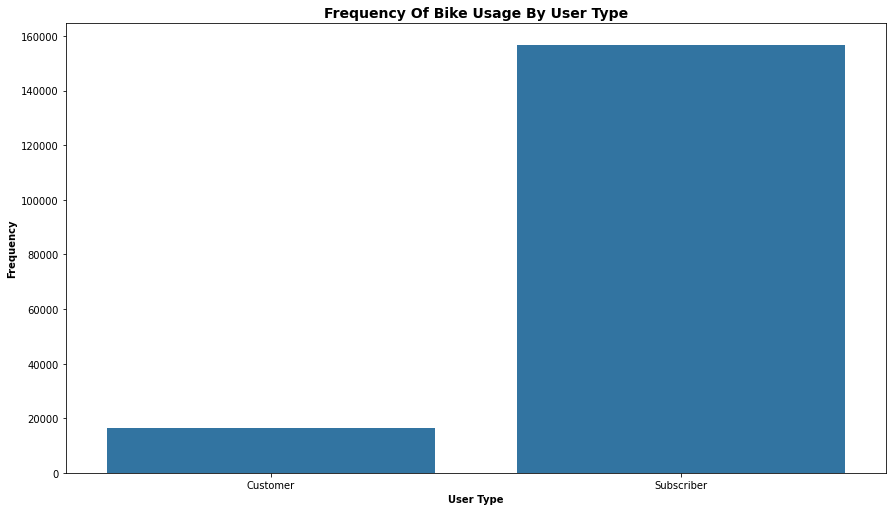

In [37]:
#plot user_type with a barchart
plt.figure(figsize=[14.7, 8.27])
sb.countplot(data=df, x='user_type', color=base_color)
plt.xlabel('User Type'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Frequency of bike usage by User Type'.title(), fontsize=14, weight='bold');

In [38]:
customer_prop = df[df['user_type'] == 'Customer']['user_type'].count() / df.user_type.count()
print('customer_proportion = ',customer_prop)

customer_proportion =  0.0953828757362995


In [39]:
subscriber_prop = df[df['user_type'] == 'Subscriber']['user_type'].count() / df.user_type.count()
print('subscriber_proportion = ',subscriber_prop)

subscriber_proportion =  0.9046171242637006


**Observation4** : 90% of users in our dataset are subscribers, while the rest are customers. 

#### Explore the proprtions of each gender in our dataset

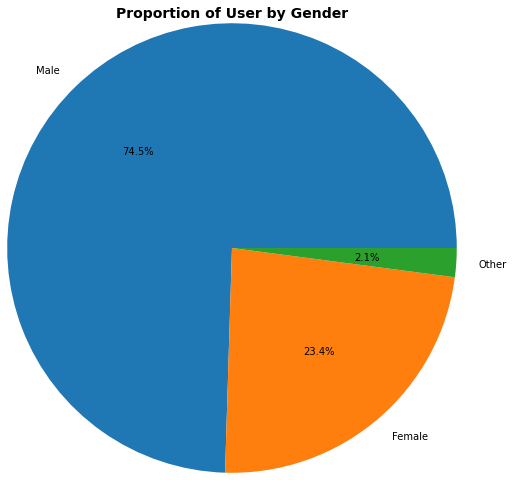

In [40]:
# plot a pie chart to visualize the proportion of each gender
plt.figure(figsize=(14.7, 8.27))
plt.pie(df.member_gender.value_counts(), labels= df.member_gender.value_counts().index,
        autopct= '%1.1f%%', radius=1.25)
plt.title('Proportion of User by Gender', fontsize = 14, weight='bold');

**Observation5** : Approximately, 74% of users in our dataset are Male and only 23% are female, while 2% of users are with other gender.

#### Explore the most frequent start_station_name in our dataset

In [41]:
df.start_station_name.value_counts()

Market St at 10th St                                         3631
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3347
Berry St at 4th St                                           2906
Montgomery St BART Station (Market St at 2nd St)             2689
Powell St BART Station (Market St at 4th St)                 2597
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

#### Since we have a large amount of station, I will work with the headed 10 stations in term of counts.

In [42]:
station_10 = df.start_station_name.value_counts(sort=True, ascending=False)[:10].index

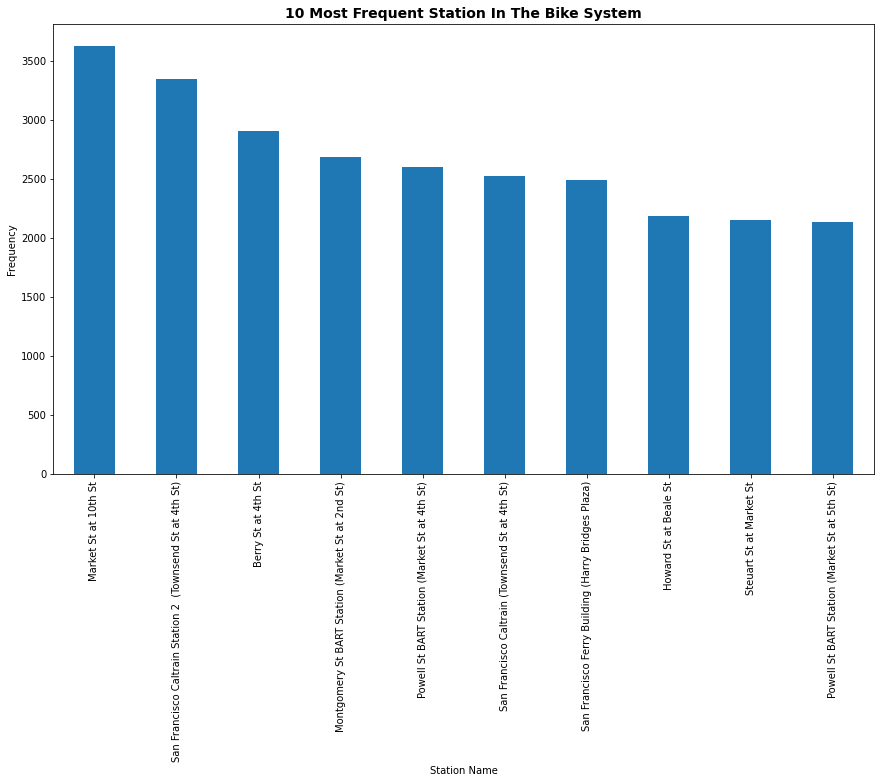

In [43]:
plt.figure(figsize=(14.7, 8.27))
df.start_station_name.value_counts(sort=True, ascending=False)[:10].plot(kind='bar');
plt.xlabel('Station Name')
plt.ylabel('Frequency')
plt.title('10 Most Frequent Station in the Bike System'.title(), fontsize=14, weight='bold')
plt.xticks(rotation=90);

**Observation6** : The Market St 10th St is the most frequent start_station in the share bike system. Also San Francisco Caltarian indicates an important trip number.

### 3. Bivariate Exploration

In this part I will try to visualize relations between each of start_hour and start_dayofweek with the rest of variables of interest (duration, member_gender, user_type).

#### Look at the average duration_sec for each  start_hour in the dataset

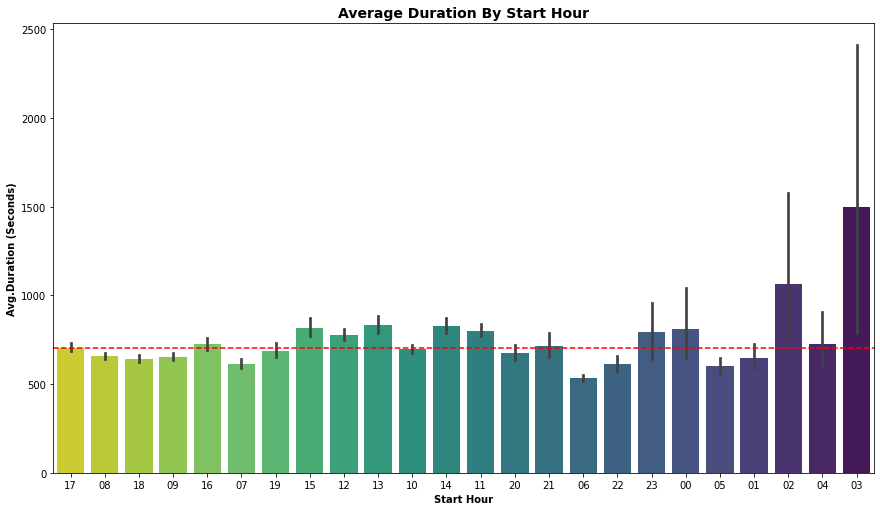

In [44]:
# plot a barplot to depict the duration average in second for each of start_hour 
plt.figure(figsize=(14.7, 8.27))
order = df.start_hour.value_counts().index
sb.barplot(data=df, x='start_hour', y='duration_sec'
          , palette='viridis_r', order = order)
plt.xlabel('Start Hour'.title(), fontsize=10, weight='bold')
plt.ylabel('Avg.Duration (seconds)'.title(), fontsize=10, weight='bold')
plt.title('Average Duration by Start Hour'.title(), fontsize=14, weight='bold')
plt.axhline(df.duration_sec.mean(), ls='--', color ='r');

**Observation7** : 
1. Longest trip durations are indicated arround 03am.
2. From the plot above and the result of the most frequent hours, later hours are accompanied by longer trip durations and low frequency.
3. Rush hours (8am, 17pm) are accompanied by low durations compared to those on later hours but with a high frequency.

#### Look at the average duration_sec for each  start_dayofweek in the dataset

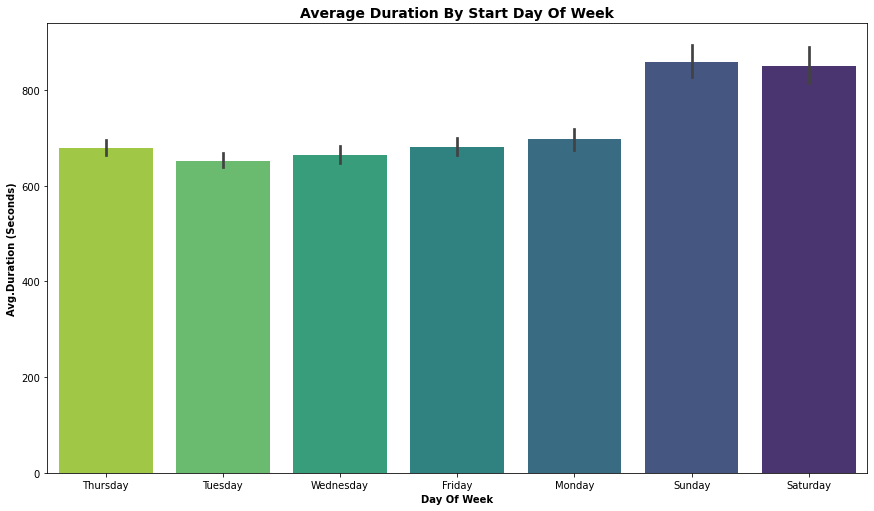

In [45]:
# plot a barplot to depict the duration average in second for each of start_hdayofweek
plt.figure(figsize=[14.7, 8.27])
order = df.start_dayofweek.value_counts().index
sb.barplot(data=df, x='start_dayofweek', y='duration_sec'
          , palette='viridis_r', order = order)
plt.xlabel('Day Of Week'.title(), fontsize=10, weight='bold')
plt.ylabel('Avg.Duration (seconds)'.title(), fontsize=10, weight='bold')
plt.title('Average Duration by Start Day of Week'.title(), fontsize=14, weight='bold');

**Observation8** : The observation is the same as for the start_hour
1. Longest trip durations are indicated during weekend.
2. Weekends are accompanied by longer trip durations and low frequency.

#### Look at the bike usage frequency by start_hour for each gender

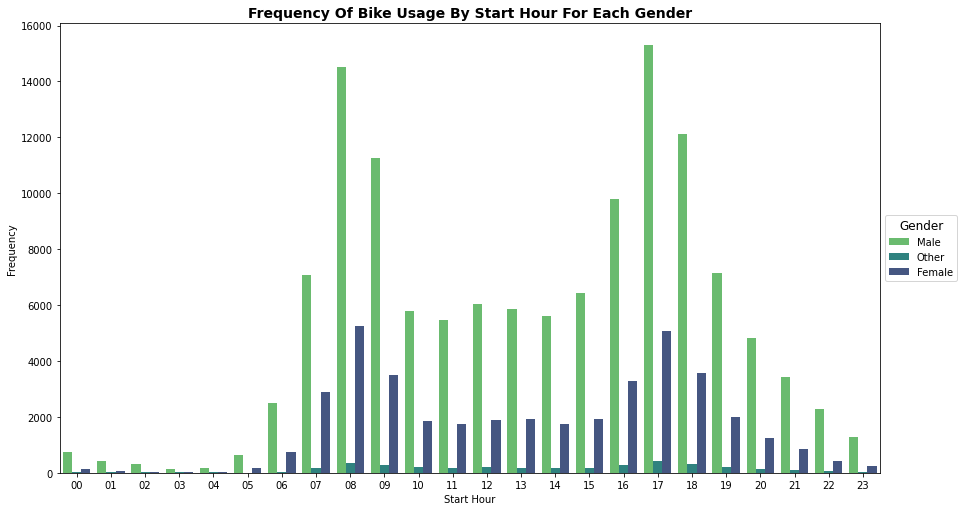

In [46]:
# plot a countplot to visualize the frequency of bike usage by start_hour for each gender 
plt.figure(figsize=[14.7, 8.27])

#plot the data with myCountPlot function
myCountPlot(df, 'start_hour', hour_order, color=None, hueVar='member_gender', palette='viridis_r')

#Labels & titles
plt.title('Frequency of bike usage by Start Hour for each Gender'.title(), fontsize=14, weight='bold');

#Legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Gender", title_fontsize = 12);

**Observation9** : Most of bikes are used by Males during rush hours, the Male gender is dominant in our dataset, that's simply can be explained by the high proportion of Males compared to female and other gender.

#### Look at the bike usage frequency by start_dayofweek for each gender

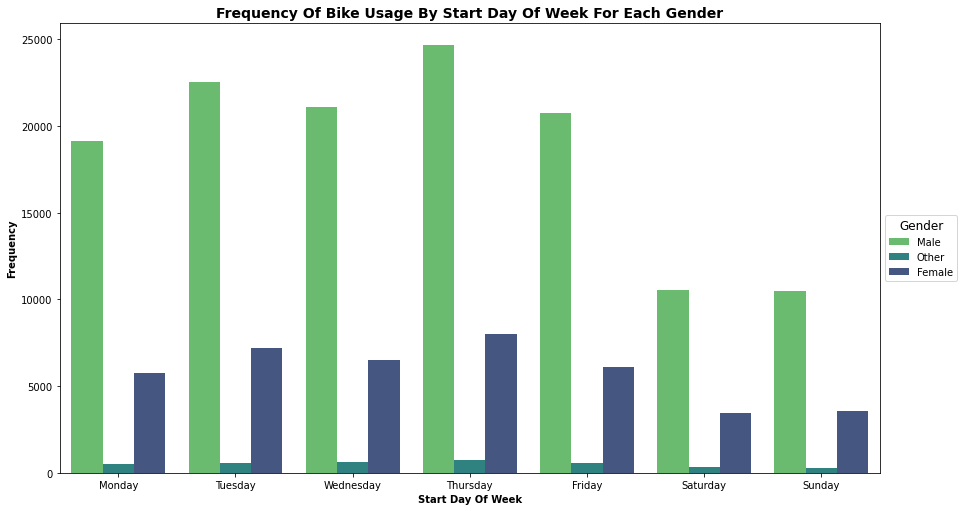

In [47]:
plt.figure(figsize=(14.7, 8.27))
order = df.start_dayofweek.value_counts().index
sb.countplot(data=df, x='start_dayofweek', hue='member_gender',
            palette='viridis_r', order=day_order)
plt.xlabel('Start Day of Week'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Frequency of bike usage by Start Day of Week for each Gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Gender", title_fontsize = 12);

**Observation10** : This plot serve us the same information in the previous one, during all day the male gender is much more important in term of frequency.

#### Explore the relation between type of user and hour_start 

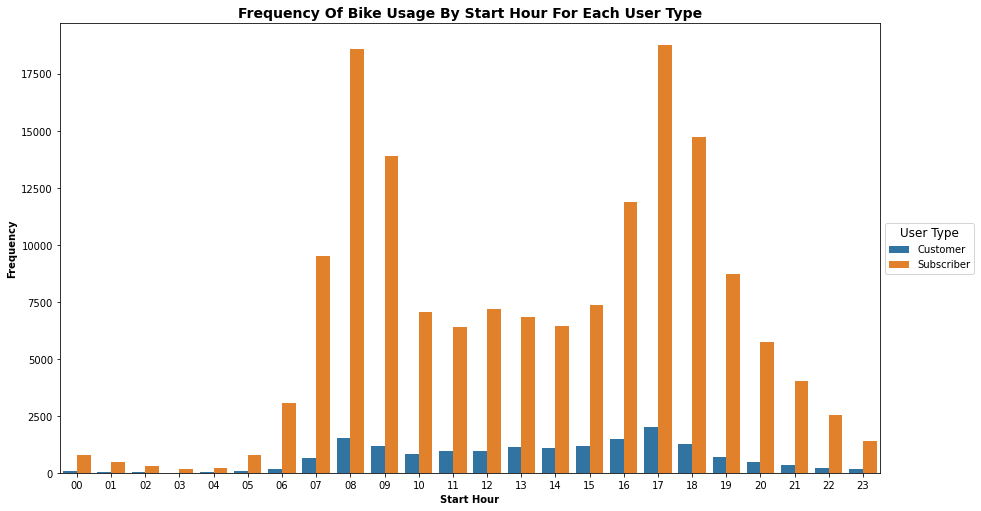

In [48]:
#plot a countplot to visualize trips by start_hour for each of user type
fig, ax = plt.subplots(figsize=(14.7, 8.27))
ax = sb.countplot(data=df, x='start_hour', hue='user_type', order=hour_order)
plt.xlabel('Start Hour'.title(), fontsize=10, weight='bold')
plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
plt.title('Frequency of bike usage by Start Hour for each User Type'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

**Observation11** : 
Majority of bike riders all time are subscribers, the most frequent hours are the same as through the total(rush hours 8am and 17h). 





#### Explore the type of user by the member age

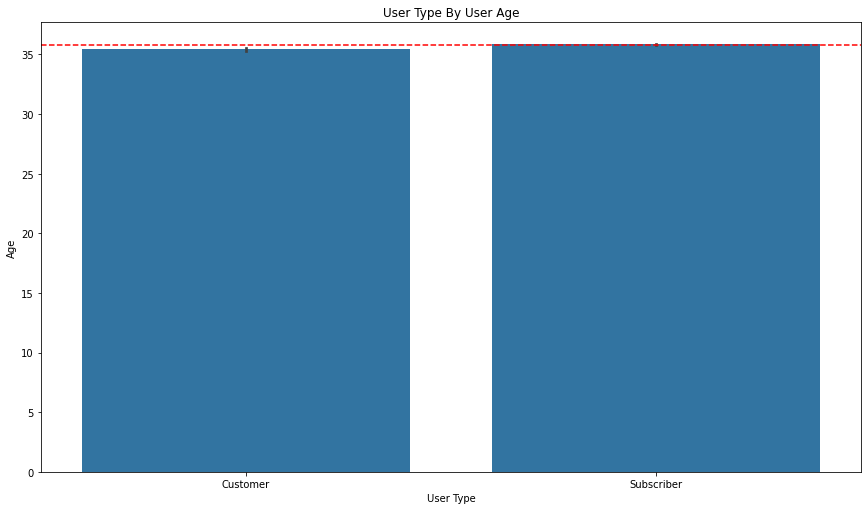

In [49]:
#plot the user_type by the range of member_age 
fig, ax = plt.subplots(figsize=(14.7, 8.27))
sb.barplot(data = df, x='user_type', y='member_age', color=base_color)
ax.set(xlabel = 'User Type', ylabel = 'Age', title = 'User Type By User Age')
ax.axhline(df['member_age'].mean(), ls = '--', color='r');

**Observation12** : 
 The two user_type falling barely in the same range of age member.

#### Explore how the trip duration variation for each of 10 most frequent start_station

In [50]:
#create 10 most frequent station_name 
head_stations = df.start_station_name.value_counts(sort=True, ascending=False)[:10].index

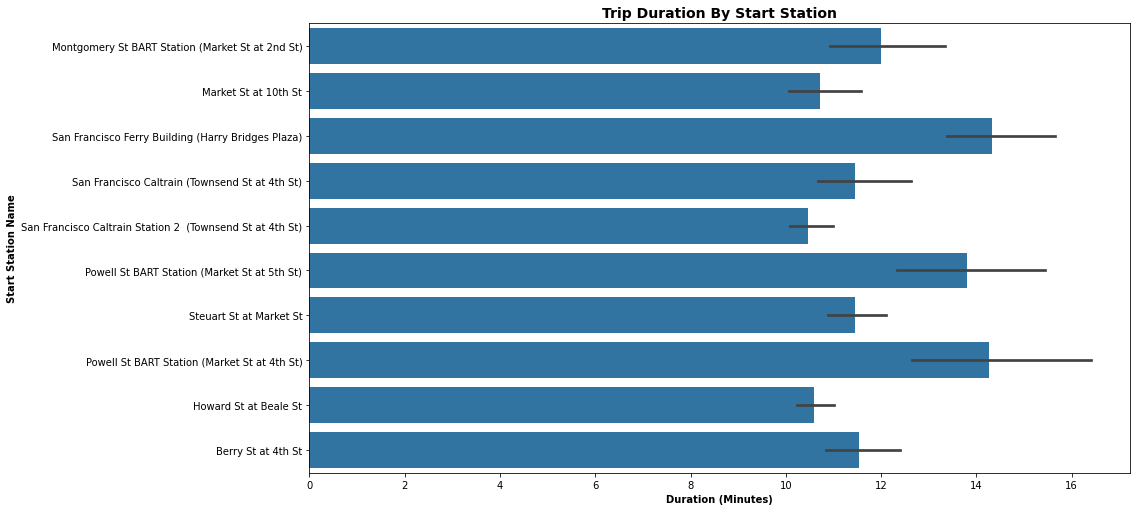

In [51]:
#plot duration in minutes for each start_station
plt.figure(figsize=(14.7, 8.27))
df_sub = df.loc[df['start_station_name'].isin(head_stations)]
sb.barplot(data=df_sub, y='start_station_name', x = 'duration_min', color=base_color)
plt.ylabel('Start Station Name'.title(), fontsize=10, weight='bold')
plt.xlabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Trip Duration by Start Station'.title(), fontsize=14, weight='bold');





**Observation13** : San Fransisco and Powell St stations have the longest trip durations on the dataset. That's may help when searching to improve bike availability for these stations.

### 4. Multivariate Exploration

#### Explore the trip duration in minutes by the start_dayofweek by each gender 

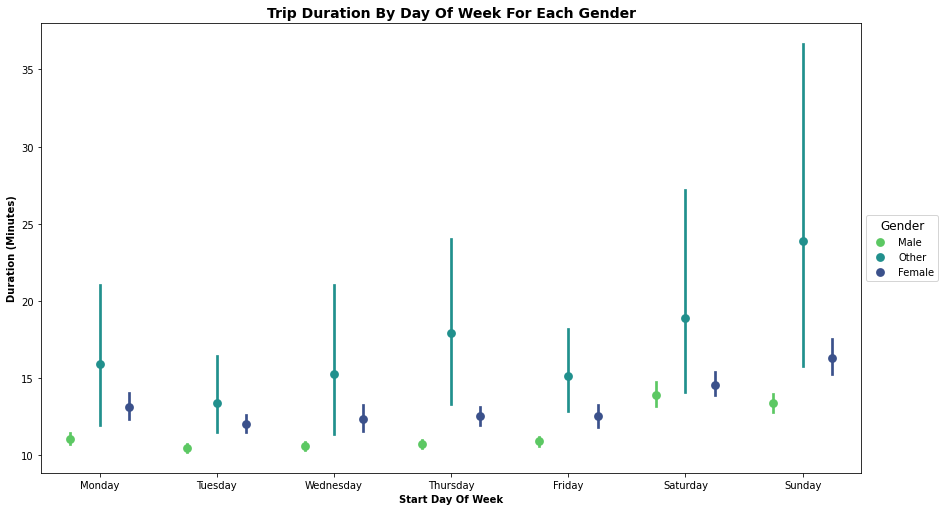

In [52]:
# multivariate plot of duration in minutes by start_dayofweek and member_gender
plt.figure(figsize=(14.7, 8.27))
ax = sb.pointplot(data=df, x='start_dayofweek', y='duration_min',
                  hue='member_gender', palette = 'viridis_r', linestyles='', dodge=0.5, order=day_order)
plt.xlabel('Start Day of Week'.title(), fontsize=10, weight='bold')
plt.ylabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Trip Duration by day of week for each gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Gender", title_fontsize = 12);
plt.show();

**Observation14** : 
1. The trip duration is longer during weekend as we found on the previous part, but majority of longest trips fall in the other gender followed by female and then male with th, also for Males and Females the longest trip durations indicated on weekends.
2. On Thursday, which is the most frequent day in term of bike usage, the trip duration is almost between 10min and 13min

#### Explore the trip duration in minutes by the start_hour by each type of user

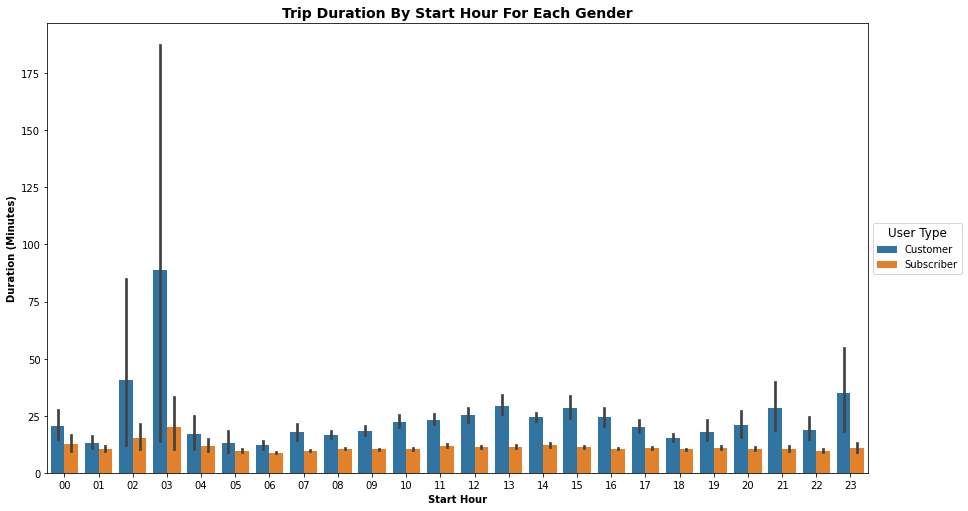

In [53]:
plt.figure(figsize=(14.7, 8.27))
sb.barplot(data=df, x ='start_hour', y= 'duration_min'
           ,hue='user_type', order=hour_order)
plt.xlabel('Start Hour'.title(), fontsize=10, weight='bold')
plt.ylabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Trip Duration by start hour for each gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

**Observation15** : 
1. During all hours of the day in our data we have important trip duration with cusrtomer than with subscriber.

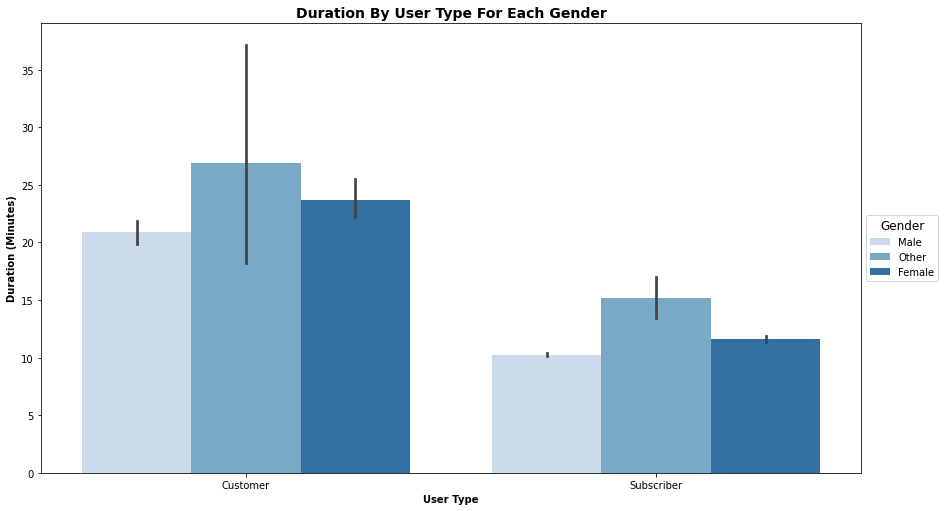

In [54]:
plt.figure(figsize=(14.7, 8.27))
sb.barplot(data=df, x ='user_type', y= 'duration_min'
           ,hue='member_gender', palette = 'Blues')
plt.xlabel('User Type'.title(), fontsize=10, weight='bold')
plt.ylabel('Duration (minutes)'.title(), fontsize=10, weight='bold')
plt.title('Duration by User Type for each Gender'.title(), fontsize=14, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Gender", title_fontsize = 12);

**Observation16** : 
1. For subscribers, which represent 90% of the data, however male are more important in number, female gender indicated more important trip duration than Male and Other gender.
2. All customers duration are greater than 20minutes.

### Export Clean Data

In [58]:
df.to_csv('master_clean_data', index = False)

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

At first I investigate about rush hours during the day and the most frequent day in term of frequency, we have found two rush hours in our share bike system and 'Thursday' as most frequent day, these two feature give us observation of the trip 'duration' variation through days and weeks.
The ivestigation of 'duration' was extended by exploring its dependency with the 10 most frequent start station, also by looking at the impact of the two categorical features user_type and member_gender, as presented in the last multivariate plots, we can answer what is the trip duration for each type of user and for each gender. 

#### Were there any interesting or surprising interactions between features?

By exploring the realtion between duration in minutes, the 'start_dayofweek and the member_gender, in the first multivariate plot, that give us a more clear idea about the variation of duration feature in our dataset, during all the week the longest trip durations are observed with other gender followed by female gender and the shortest duration with the male gender regardless of the frequency of bike usage. That's may be an answer but more important that's can lead to more questions.

### 5. Sources

Through this project, I have used visualizing technics showed on the course. I was working and searching on the internet and in documentation, for various difficulties I have stacked in.
I have used some sources :
- https://stackoverflow.com/
- https://www.fordgobike.com/
- Python libraries documentation (matplotlib, seaborn).